In [74]:
#importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import ast

<h1>Exploración inicial</h1>

In [75]:
#cargamos el dataset
data = pd.read_parquet("DATASETEDA.parquet")

In [76]:
#Mostranos las primeras filas para ver la estructura de los datos
data.head(6)

,item_id,playtime_forever,user_id,recommend,year_review,sentiment_analysis,publisher,genres,app_name,tags,specs,price,early_access,year_game
0,22200,271.0,76561197970982479,True,2011,2.0,ACE Team,"['Action', 'Indie']",Zeno Clash,"['Action', 'Indie', 'Surreal', ""Beat 'em up"", ...","['Single-player', 'Steam Achievements', 'Steam...",9.99,False,2009
1,1250,10006.0,76561197970982479,True,2011,2.0,Tripwire Interactive,['Action'],Killing Floor,"['FPS', 'Zombies', 'Co-op', 'Survival', 'Actio...","['Single-player', 'Multi-player', 'Co-op', 'Cr...",19.99,False,2009
2,227300,551.0,js41637,True,2013,2.0,SCS Software,"['Indie', 'Simulation']",Euro Truck Simulator 2,"['Simulation', 'Driving', 'Open World', 'Reali...","['Single-player', 'Steam Achievements', 'Steam...",19.99,False,2013
3,239030,349.0,js41637,True,2013,2.0,3909,"['Adventure', 'Indie']","Papers, Please","['Indie', 'Political', 'Simulation', 'Point & ...","['Single-player', 'Steam Achievements', 'Steam...",9.99,False,2013
4,107200,3225.0,evcentric,True,2014,2.0,MinMax Games Ltd.,"['Action', 'Indie', 'RPG', 'Strategy']",Space Pirates and Zombies,"['Space', 'Action', 'Indie', 'Sci-fi', 'Strate...","['Single-player', 'Steam Achievements', 'Steam...",9.99,False,2011
5,224500,13618.0,evcentric,True,2014,2.0,Robotronic Games,"['Indie', 'Simulation', 'Strategy']",Gnomoria,"['Sandbox', 'Strategy', 'City Builder', 'Simul...","['Single-player', 'Steam Trading Cards', 'Stea...",14.99,False,2016


In [77]:
#obtenemos informacion basica sobre el dataset

print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38545 entries, 0 to 38544
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             38545 non-null  object 
 1   playtime_forever    38545 non-null  float64
 2   user_id             38545 non-null  object 
 3   recommend           38545 non-null  bool   
 4   year_review         31598 non-null  object 
 5   sentiment_analysis  38545 non-null  float64
 6   publisher           38067 non-null  object 
 7   genres              38414 non-null  object 
 8   app_name            38545 non-null  object 
 9   tags                38545 non-null  object 
 10  specs               38439 non-null  object 
 11  price               38227 non-null  object 
 12  early_access        38545 non-null  bool   
 13  year_game           38363 non-null  Int64  
dtypes: Int64(1), bool(2), float64(2), object(9)
memory usage: 3.6+ MB
None
(38545, 14)


In [78]:
import pandas as pd


# Rellenar valores nulos en las columnas 'year_review' y 'sentiment_analysis' con un valor predeterminado, por ejemplo 0
data['year_review'] = data['year_review'].fillna(2000)
data['sentiment_analysis'] = data['sentiment_analysis'].fillna(1)
data['price'] = data['price'].replace(['Free To Play', 'Free', 'Play the Demo', 'Play WARMACHINE: Tactics Demo', 'Install Now', 'Free to Use', 'Free to Play', 'Play for Free!', 'Free Movie', 'Free HITMAN™ Holiday Pack', 'Third-party', 'Free Mod'], 0)

# Convertir las columnas al tipo de dato deseado
#data = data.astype({"item_id": int, "playtime_forever": int, "user_id": str, "year_review": int, "sentiment_analysis": int, "price": float})


In [79]:
data = data.astype({"item_id": int, "playtime_forever": int, "user_id": str, "year_review": int, "sentiment_analysis": int, "price": float})


In [80]:
# Reemplazar los valores None con el string "Desconocido"
data[['genres', 'tags', 'specs']] = data[['genres', 'tags', 'specs']].fillna('Desconocido')

In [81]:
#definimos la función que transformará en lista todos aquellos datos que perdieron esta condición
def obtener(celda):
    if pd.isnull(celda):
        return None
    if isinstance(celda, str) and celda.startswith("[") and celda.endswith("]"):
        try:
            return ast.literal_eval(celda)
        except (ValueError, SyntaxError):
            return celda  # Devuelve la celda original si no se puede convertir a lista
    return celda


#aplicamos esta función a todo el dataframe
data = data.applymap(obtener)

C:\Users\jhose\AppData\Local\Temp\ipykernel_27768\2997685877.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(obtener)


<H1>Estadísticas y distribuciones</h1>

<h2>Análisis univariable</h2>

<h3><b>Variables numéricas</b></h3>

In [82]:
data.columns

Index(['item_id', 'playtime_forever', 'user_id', 'recommend', 'year_review',
       'sentiment_analysis', 'publisher', 'genres', 'app_name', 'tags',
       'specs', 'price', 'early_access', 'year_game'],
      dtype='object')

In [83]:
#empezamos con un analisis general
data.describe()

,item_id,playtime_forever,year_review,sentiment_analysis,price,year_game
count,38545.000000,38545.000000,38545.000000,38545.000000,38227.000000,38363.000000
mean,179946.359502,9388.456661,2011.639045,1.472331,15.059681,2012.362667
std,129685.990312,22721.011271,5.507988,0.759961,14.245225,3.166056
min,10.000000,0.000000,2000.000000,0.000000,0.000000,1989.000000
25%,24240.000000,404.000000,2013.000000,1.000000,4.990000,2011.000000
50%,220200.000000,1538.000000,2014.000000,2.000000,14.990000,2013.000000
75%,270090.000000,6721.000000,2015.000000,2.000000,19.990000,2014.000000
max,527340.000000,642773.000000,2015.000000,2.000000,771.710000,2017.000000


In [84]:
numeric_columns = ['playtime_forever', 'year_review', 'sentiment_analysis', 'price', 'year_game']

<h3>Histogramas y gráficos de densidad</h3>

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38545 entries, 0 to 38544
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             38545 non-null  int64  
 1   playtime_forever    38545 non-null  int64  
 2   user_id             38545 non-null  object 
 3   recommend           38545 non-null  bool   
 4   year_review         38545 non-null  int64  
 5   sentiment_analysis  38545 non-null  int64  
 6   publisher           38067 non-null  object 
 7   genres              38545 non-null  object 
 8   app_name            38545 non-null  object 
 9   tags                38545 non-null  object 
 10  specs               38545 non-null  object 
 11  price               38227 non-null  float64
 12  early_access        38545 non-null  bool   
 13  year_game           38363 non-null  float64
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 3.6+ MB


C:\Users\jhose\AppData\Local\Temp\ipykernel_27768\2392105088.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, ax=ax)
C:\Users\jhose\AppData\Local\Temp\ipykernel_27768\2392105088.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, ax=ax)


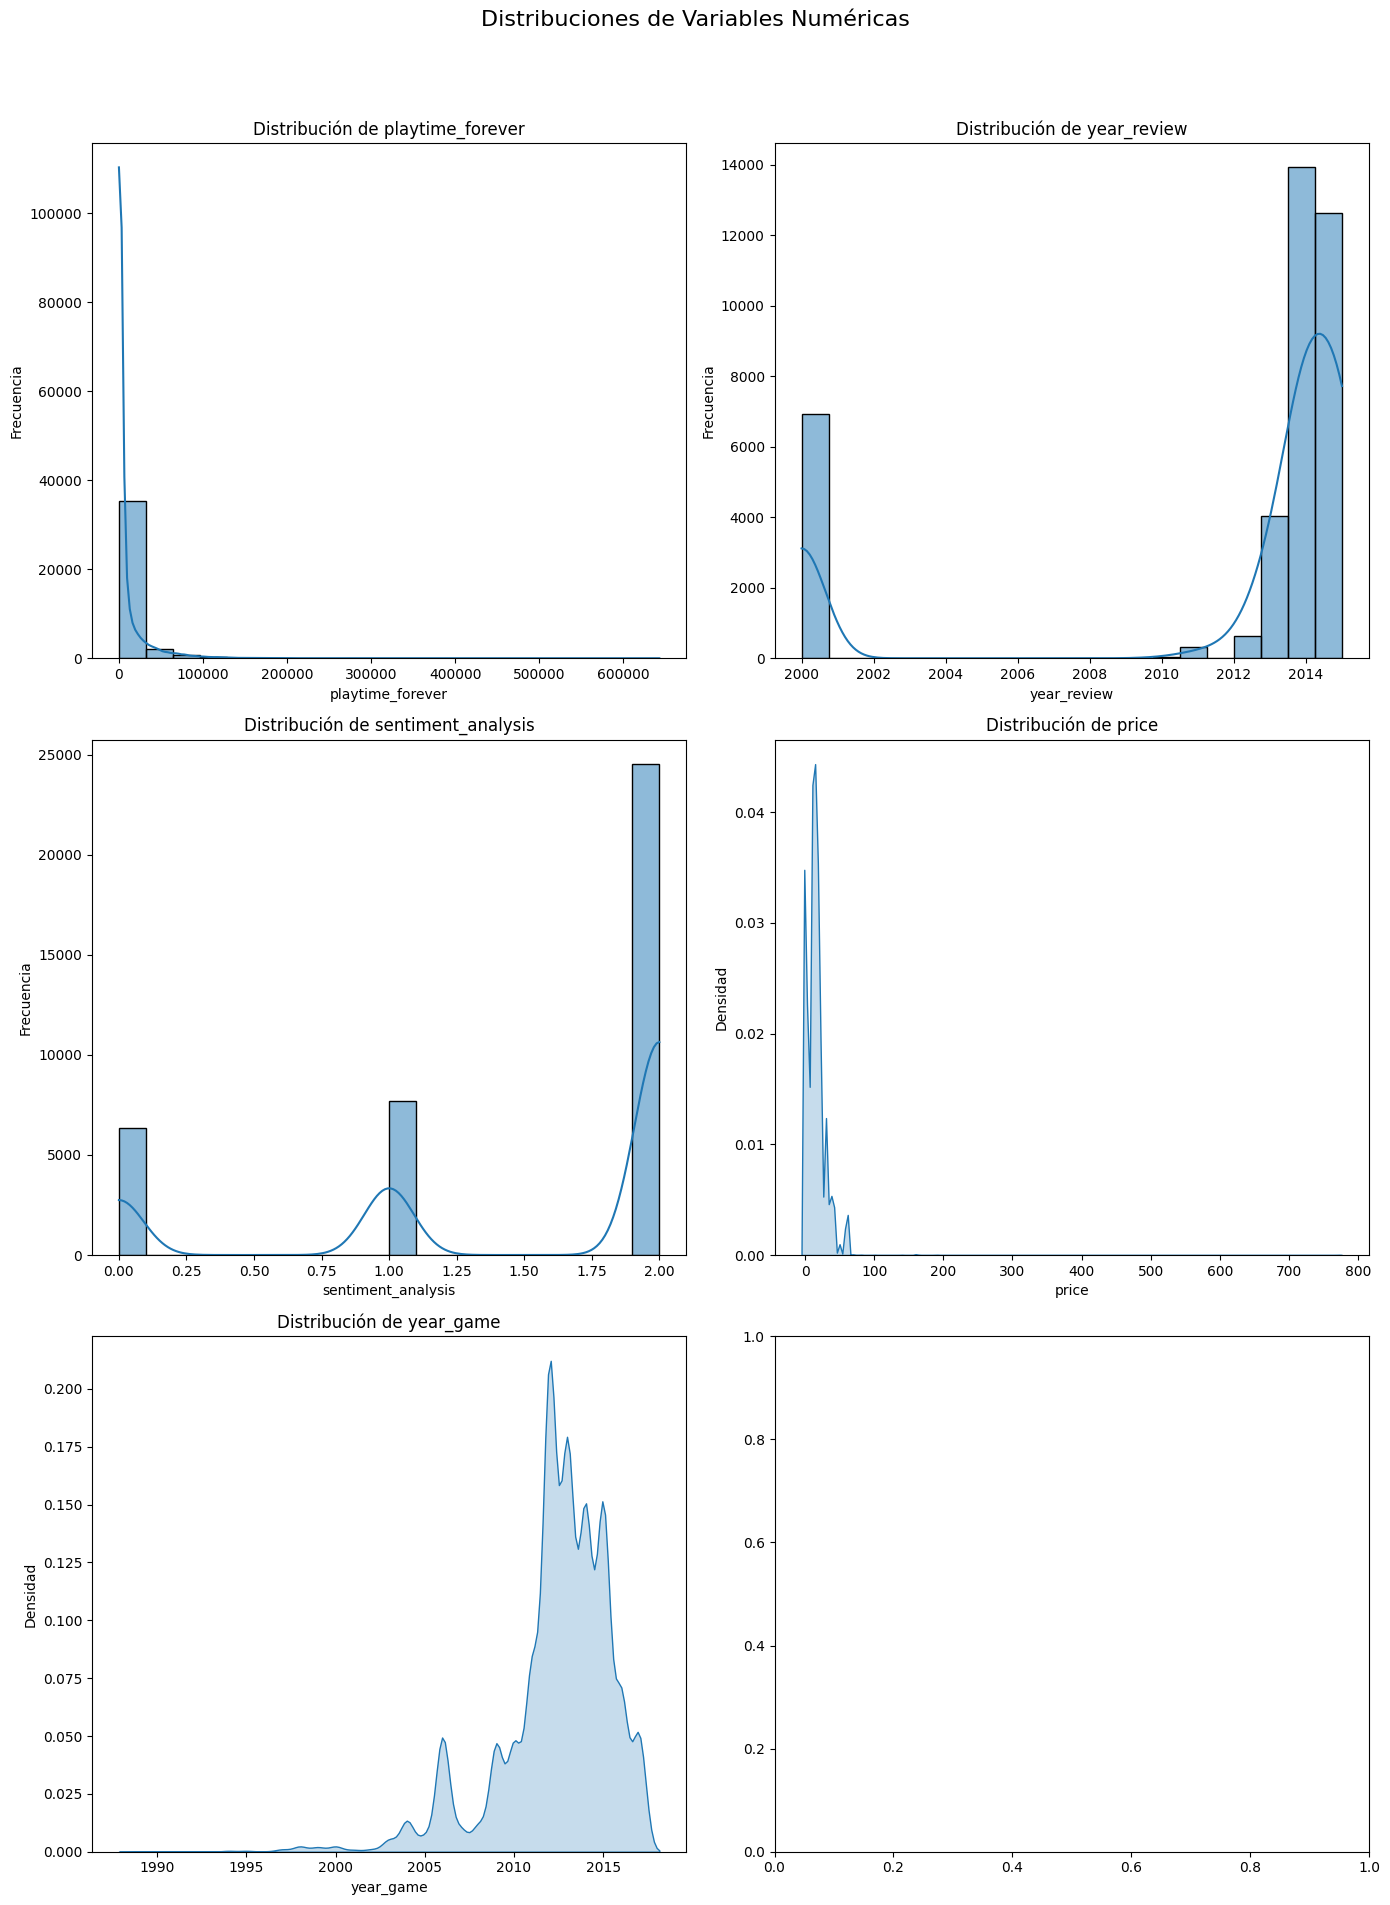

In [86]:
# Calcular el número de filas y columnas para los subplots
num_plots = len(numeric_columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Crear subplots para histogramas y gráficos de densidad
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 20))
fig.suptitle('Distribuciones de Variables Numéricas', fontsize=16)

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    if data[column].dtype == 'float':
        sns.kdeplot(data[column], shade=True, ax=ax)
        ax.set_title(f'Distribución de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Densidad')
    else:
        sns.histplot(data[column], bins=20, kde=True, ax=ax)
        ax.set_title(f'Distribución de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#para columnas enteras, histograma, si no, grafico de densidad


<h3>Diagramas de caja</h3>

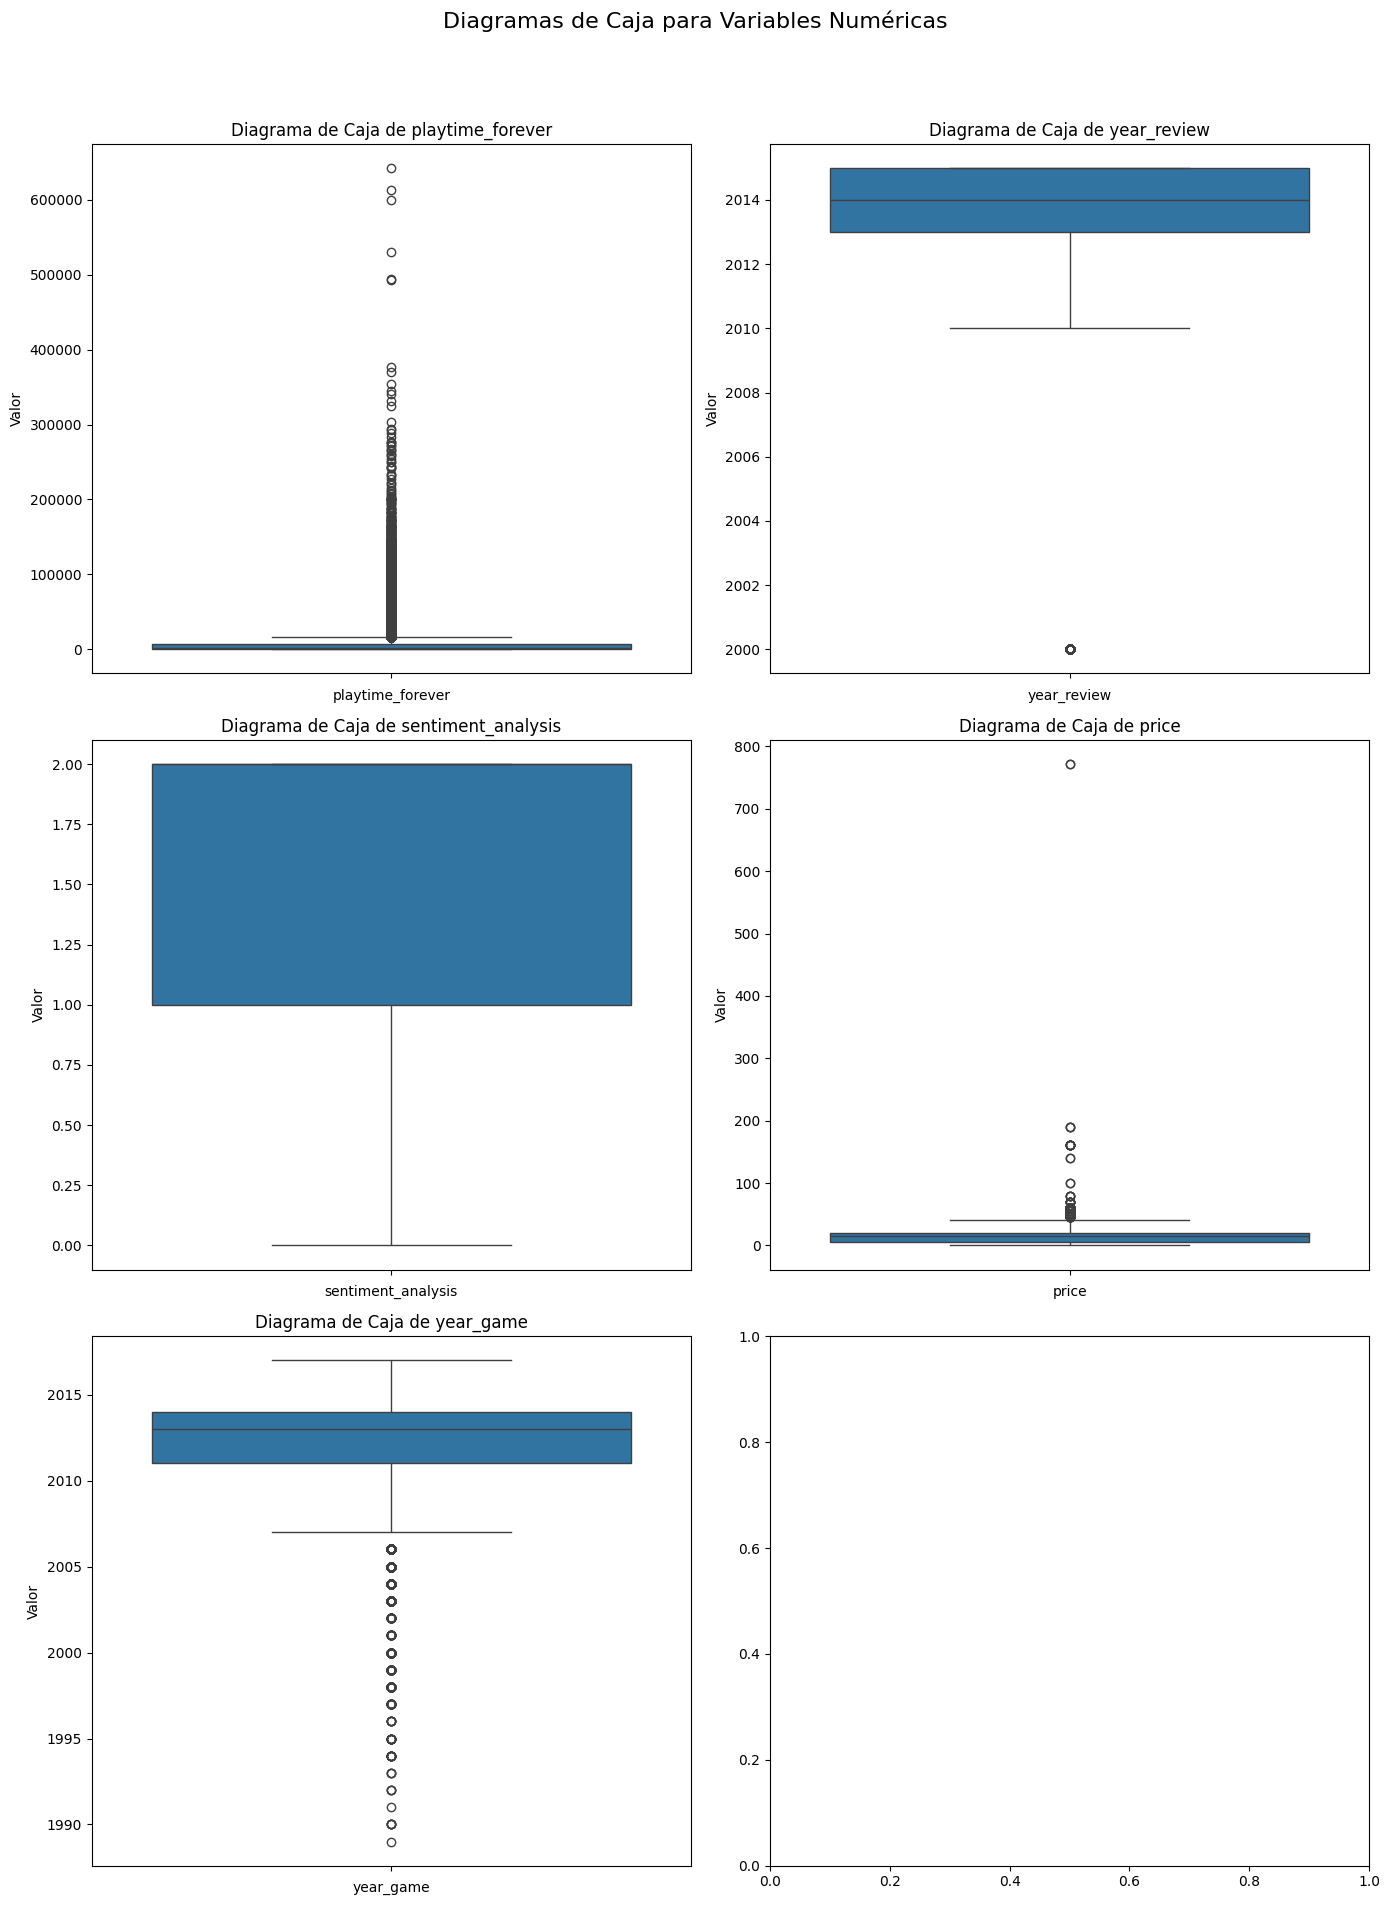

In [87]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 20))
fig.suptitle('Diagramas de Caja para Variables Numéricas', fontsize=16)

for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    sns.boxplot(data=data[column], ax=ax)
    ax.set_title(f'Diagrama de Caja de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Valor')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<h3><b>Variables categóricas</b></h3>

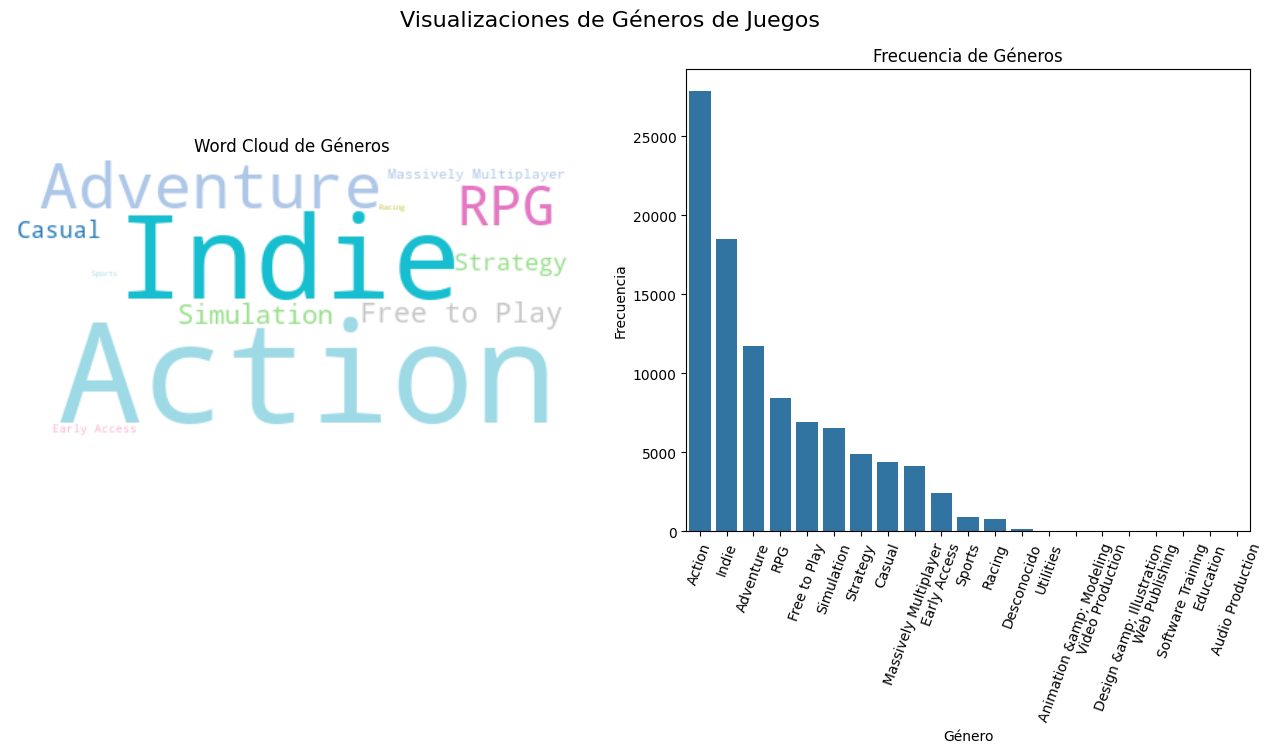

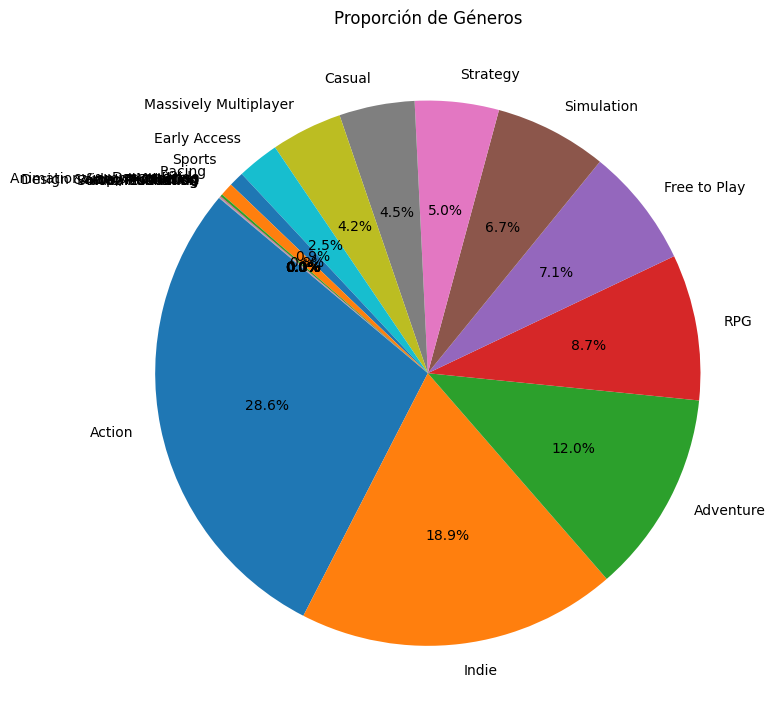

In [88]:
#Para la columna "genres"

genre_counts = data["genres"].explode().value_counts()


# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualizaciones de Géneros de Videojuegos', fontsize=16)


# worldcloud
wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='tab20').generate_from_frequencies(genre_counts)

axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word Cloud de Géneros')

# gráfico de barras
sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axs[1])
axs[1].set_title('Frecuencia de Géneros')
axs[1].set_xlabel('Género')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=70)

# pastel
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Géneros')

# Ajustar los subplots
plt.tight_layout()


plt.show()





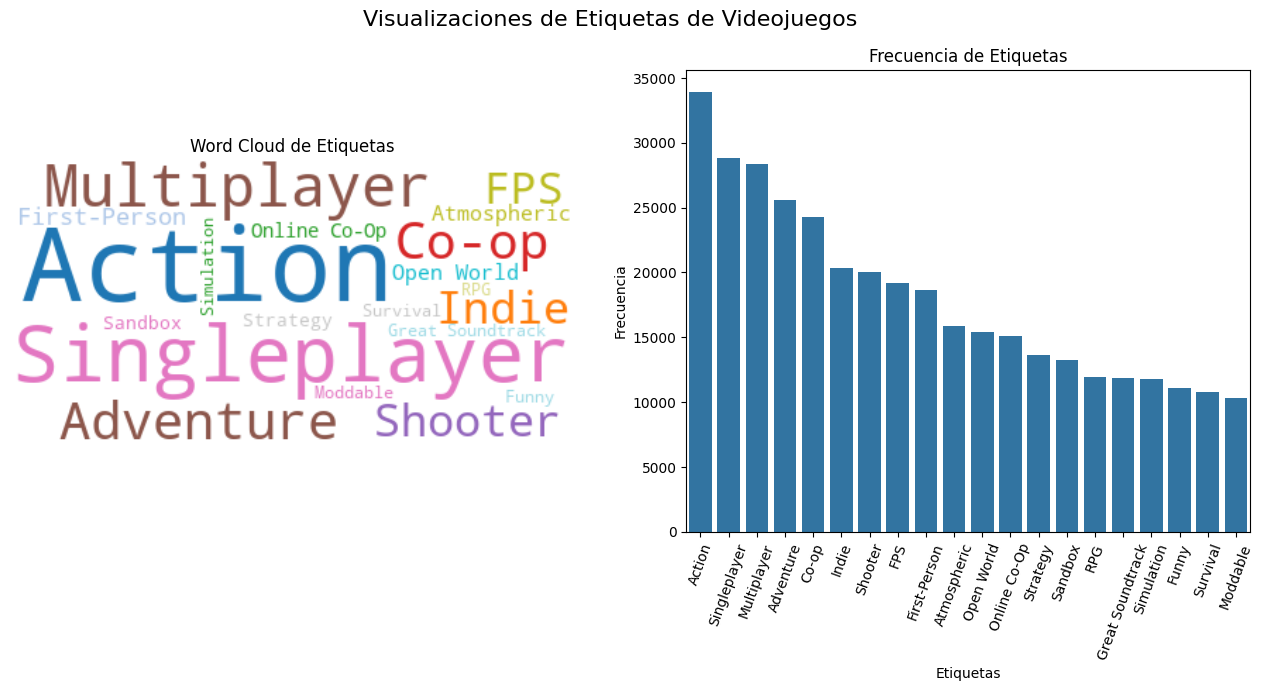

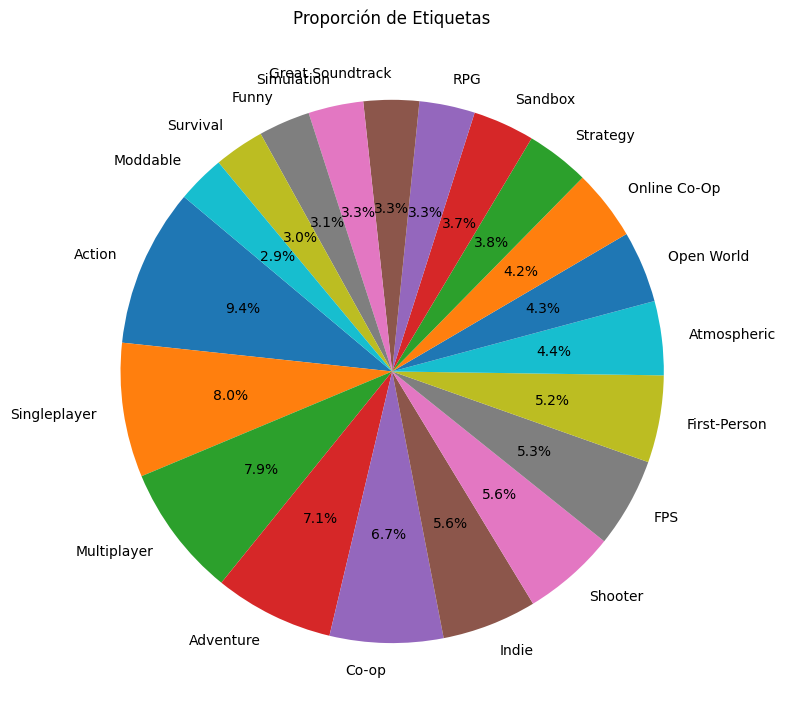

In [92]:
#Para la columna "tags"

tags_counts = data["tags"].explode().value_counts().head(20)


# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualizaciones de Etiquetas de Videojuegos', fontsize=16)


# worldcloud
wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='tab20').generate_from_frequencies(tags_counts)

axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word Cloud de Etiquetas')

# gráfico de barras
sns.barplot(x=tags_counts.index, y=tags_counts.values, ax=axs[1])
axs[1].set_title('Frecuencia de Etiquetas')
axs[1].set_xlabel('Etiquetas')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=70)

# pastel
plt.figure(figsize=(8, 8))
plt.pie(tags_counts, labels=tags_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Etiquetas')

# Ajustar los subplots
plt.tight_layout()


plt.show()





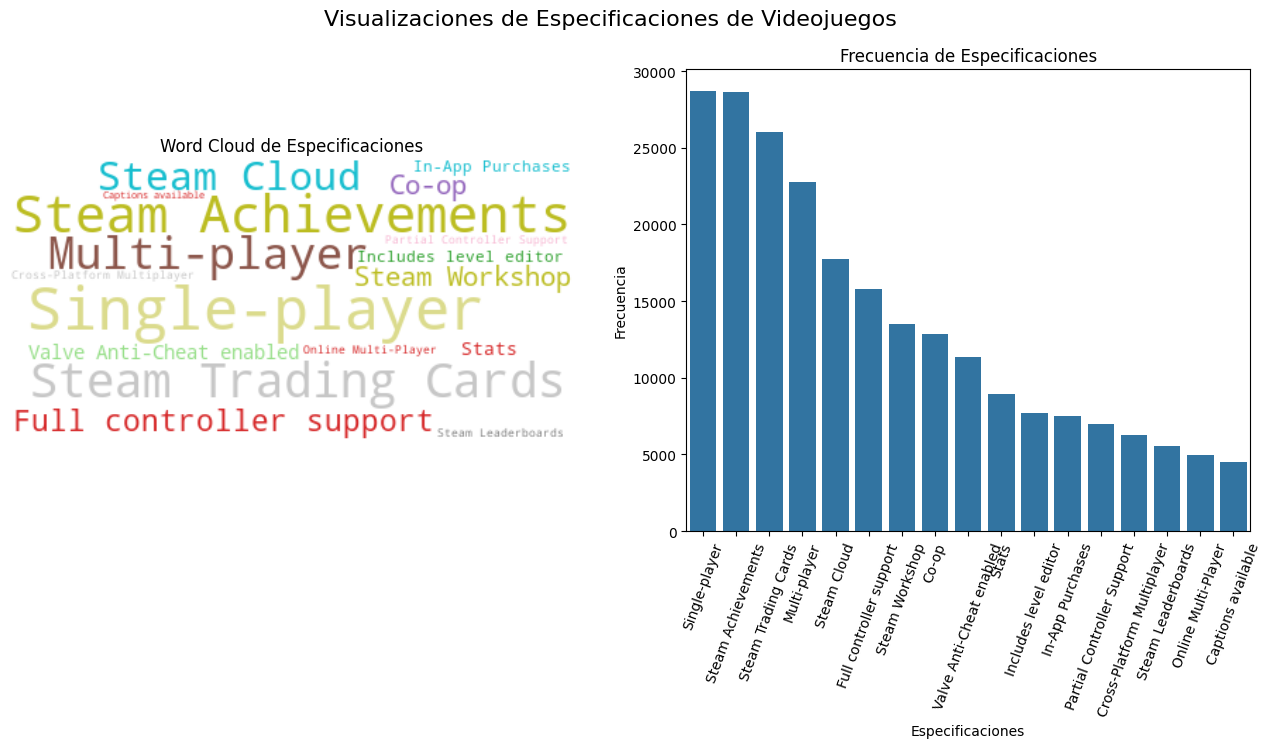

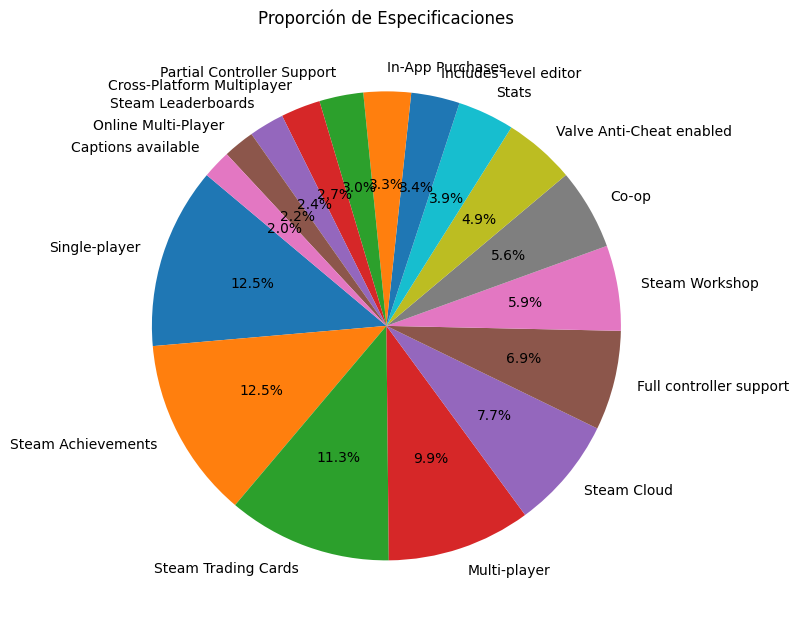

In [97]:
#Para la columna "specs"

specs_counts = data["specs"].explode().value_counts().head(17)


# Crear una figura con subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualizaciones de Especificaciones de Videojuegos', fontsize=16)


# worldcloud
wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='tab20').generate_from_frequencies(specs_counts)

axs[0].imshow(wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Word Cloud de Especificaciones')

# gráfico de barras
sns.barplot(x=specs_counts.index, y=specs_counts.values, ax=axs[1])
axs[1].set_title('Frecuencia de Especificaciones')
axs[1].set_xlabel('Especificaciones')
axs[1].set_ylabel('Frecuencia')
axs[1].tick_params(axis='x', rotation=70)

# pastel
plt.figure(figsize=(8, 8))
plt.pie(specs_counts, labels=specs_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Especificaciones')

# Ajustar los subplots
plt.tight_layout()


plt.show()





<h2>Análisis bivariable</h2>

<h3>Diagrama de dispersión en pares para todos las columnas numéricas</h3>

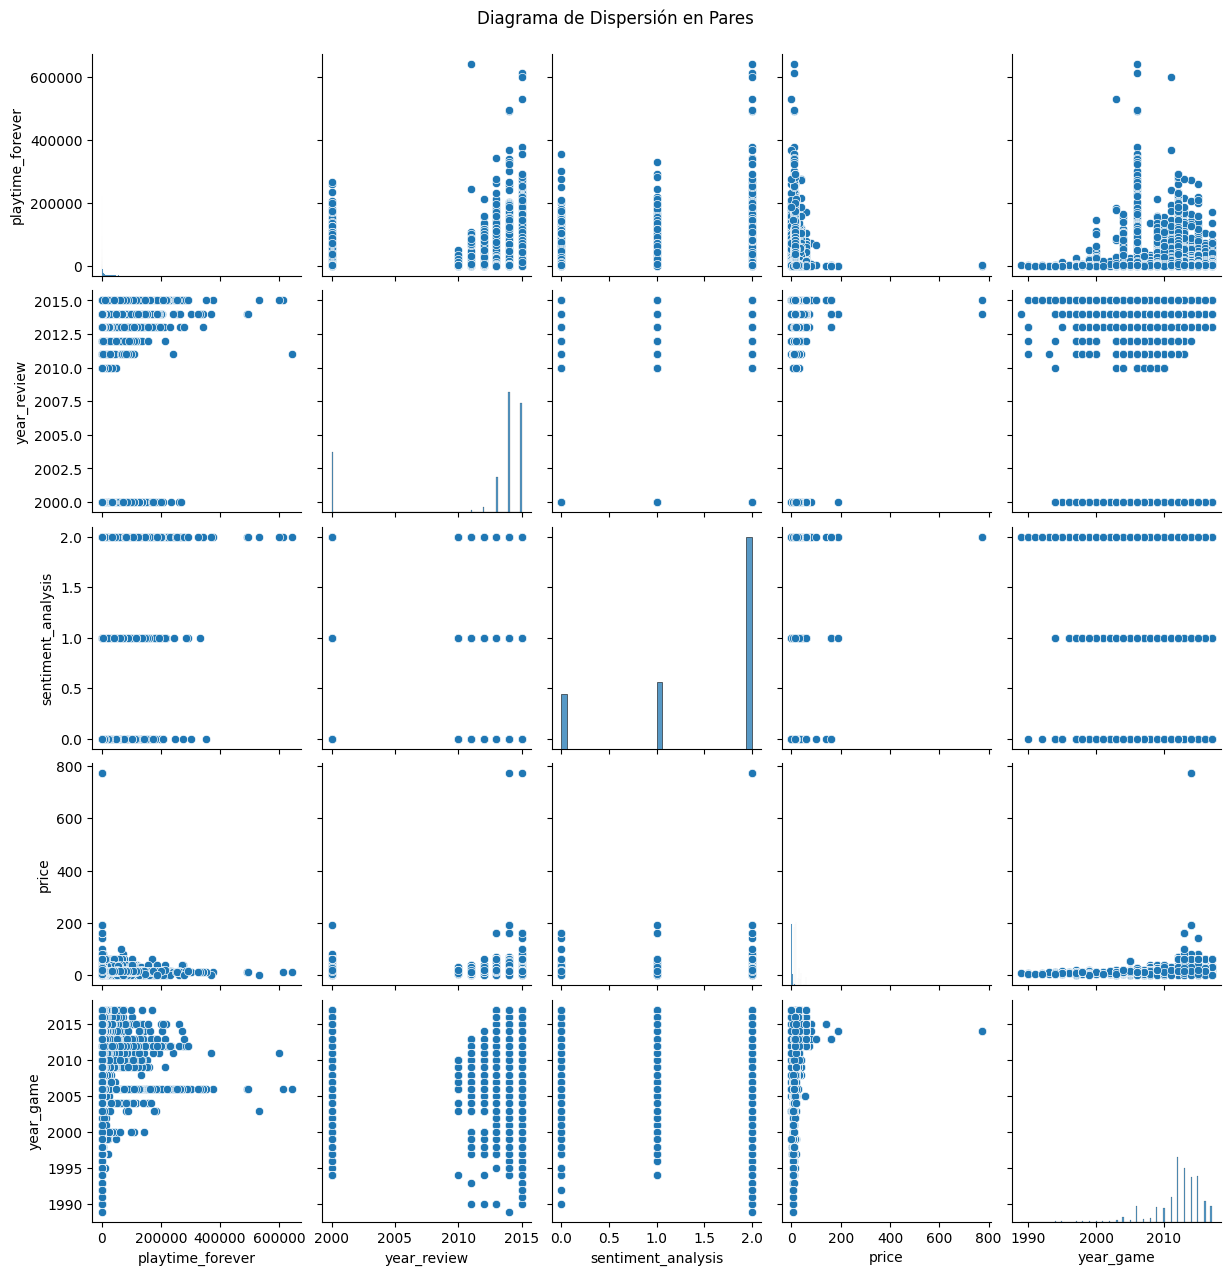

In [98]:
#Grafica de dispersion en pares para columnas numéricas
sns.pairplot(data[['playtime_forever', 'year_review', 'sentiment_analysis', 'price', 'year_game']])
plt.suptitle('Diagrama de Dispersión en Pares', y=1.02)
plt.show()

<h3>Matriz de correlación</h3>

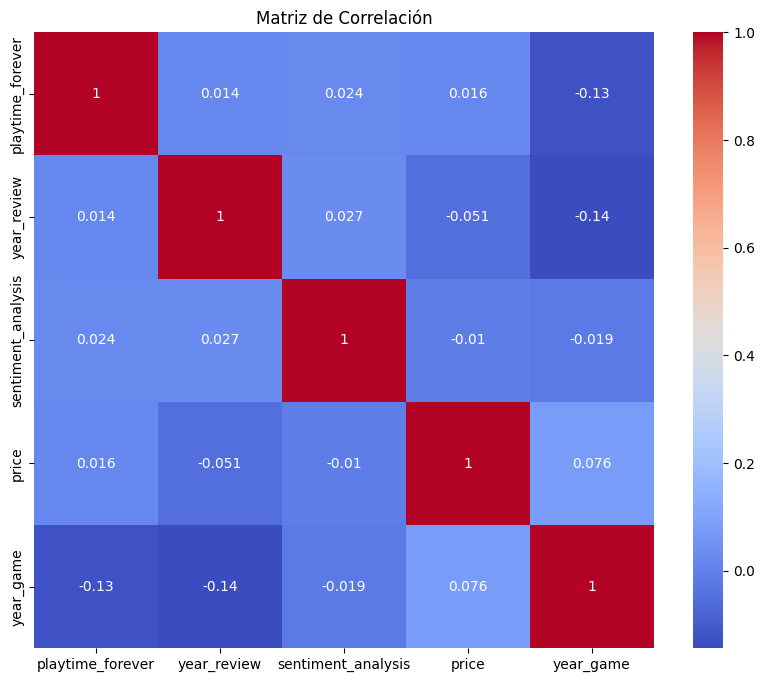

In [99]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['playtime_forever', 'year_review', 'sentiment_analysis', 'price', 'year_game']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

<h3>Tiempo de juego vs Genero</h3>

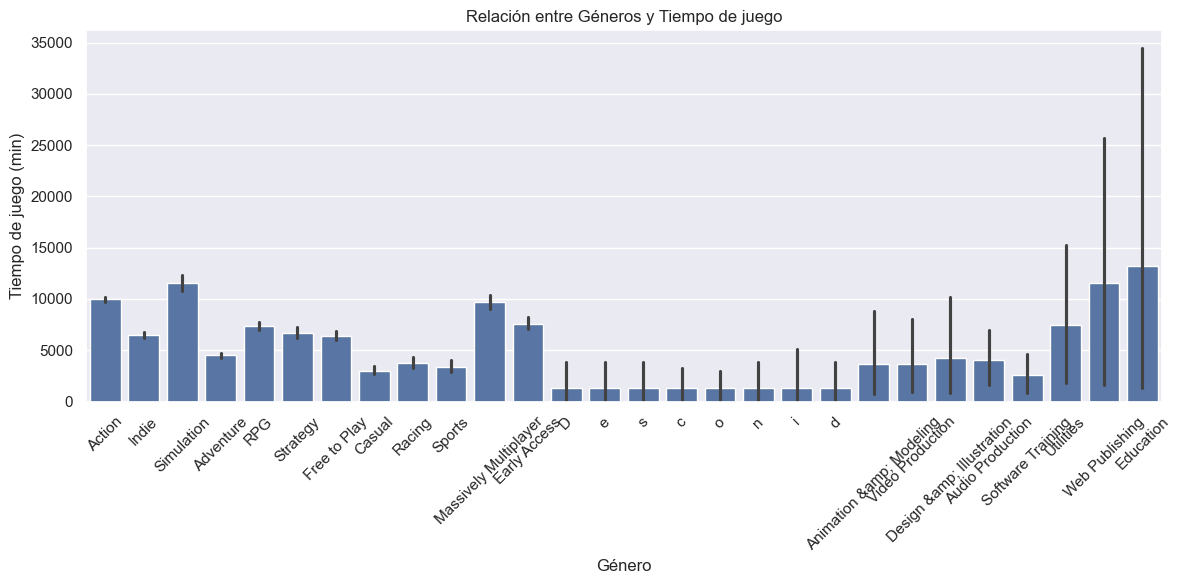

In [103]:
genre_playtime = []

for genres, playtime in zip(data['genres'], data['playtime_forever']):
    for genre in genres:
        genre_playtime.append({'genero': genre, 'tiempo': playtime})

new_df = pd.DataFrame(genre_playtime)

# Configurar el estilo de seaborn
sns.set()

# Crear un gráfico de barras que relaciona géneros con popularidad promedio
plt.figure(figsize=(12, 6))
sns.barplot(x='genero', y='tiempo', data=new_df, estimator='mean')  
plt.title('Relación entre Géneros y Tiempo de juego')
plt.xlabel('Género')
plt.ylabel('Tiempo de juego (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()